In [3]:
import os
import sys
from importlib import reload

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.insert(0,module_path)

import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('notebook')
from IPython.display import display

import library_regulons
reload(library_regulons)
from library_regulons import *
import jupyter_functions as jf
reload(jf)
import jupyter_functions as jf
from functionsDENet import loadPickle, savePickle


In [4]:
dataPath=module_path+'/data_expression/'
genes = pd.read_csv(dataPath + 'mergedGenes_RPKUM.tsv', sep='\t', index_col=0)
conditions = pd.read_csv(dataPath + 'conditions_mergedGenes.tsv', sep='\t', index_col=None)

In [5]:
neighbour_calculator = NeighbourCalculator(genes,conditions=conditions,conditions_names_column='Measurment')

In [6]:
SCALE = 'mean0std1'
LOG = True
NHUBS = 500
NEIGH_HUBS=6

In [7]:
#neigh_all, sims_all = neighbour_calculator.neighbours(n_neighbours=NEIGH_HUBS, inverse=False, scale=SCALE, log=LOG,
#                                                          return_neigh_dist=True,remove_self=True)
#savePickle('/home/karin/Documents/timeTrajectories/data/regulons/clusters/merge_similarity/kN6_m0s1log_neighbours_sims.pkl',
#          (neigh_all,sims_all))
neigh_all, sims_all=loadPickle('/home/karin/Documents/timeTrajectories/data/regulons/clusters/merge_similarity/kN6_m0s1log_neighbours_sims.pkl')

In [8]:
hubs_all = NeighbourCalculator.find_hubs(similarities=sims_all, n_hubs=NHUBS)

## Select N of neighbours for hub genes to identify all close neighbours
Check how many neighbour pairs above certain threshold are retained (N retained) for hub genes at different N of nearest neighbours. Check how many unique genes are within these (N genes).

In [ ]:
retained_stats=[]
for neighbours in [20,50,100,200,300]:
    pairs = neighbour_calculator_all.neighbours(n_neighbours=neighbours, inverse=False, scale=SCALE,
                                                            log=LOG,
                                                            return_neigh_dist=False, genes_query_names=hubs_all)
    for threshold in [0.8,0.85,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]:
        retained= NeighbourCalculator.filter_similarities(results=pairs, similarity_threshold=threshold)
        n_genes = len(set(gene for pair in retained for gene in pair))
        retained_stats.append({'kNN':neighbours,'min similaririty':threshold,'N retained':len(retained),
                               'N genes':n_genes})
retained_stats=pd.DataFrame(retained_stats)   

In [89]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(retained_stats)

,kNN,min similaririty,N retained,N genes
0,20,0.80,6745,1078
1,20,0.85,6735,1075
2,20,0.89,6679,1058
3,20,0.90,6618,1047
4,20,0.91,6509,1029
5,20,0.92,6237,1003
6,20,0.93,5622,933
7,20,0.94,4300,804
8,20,0.95,2556,644
9,20,0.96,1071,426


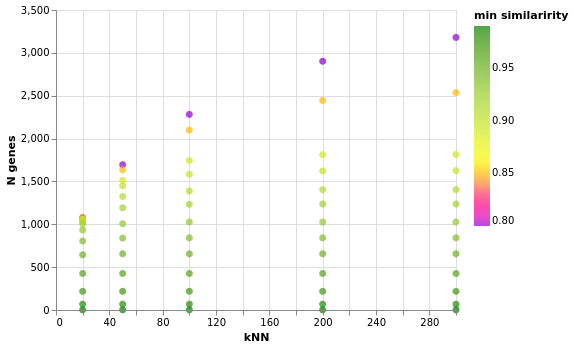

In [90]:
alt.Chart(pd.DataFrame(retained_stats)).mark_circle().encode(x='kNN',y='N genes', 
                                   color=alt.Color('min similaririty',scale=
                                                   alt.Scale(range=['darkviolet','yellow','yellowgreen','green']))
                                  ).configure_circle(size=50)

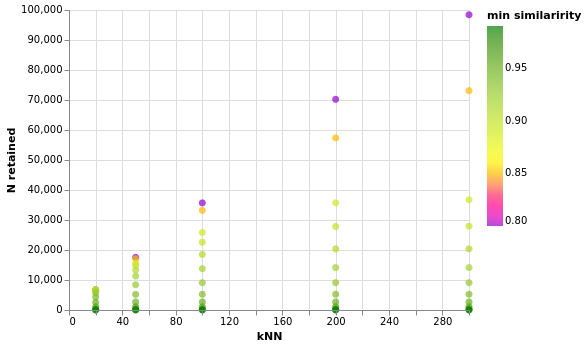

In [91]:
alt.Chart(pd.DataFrame(retained_stats)).mark_circle().encode(x='kNN',y='N retained', 
                                   color=alt.Color('min similaririty',scale=
                                                   alt.Scale(range=['darkviolet','yellow','yellowgreen','green']))
                                  ).configure_circle(size=50)

## Similarity threshold

In [9]:
available_replicates=list(set(conditions.loc[:,'Replicate']))

In [ ]:
result_all=pd.DataFrame()
for i in range(5):
    subset1,subset2=jf.sample_from_list(available_replicates,sample1=24,sample2=24)
    result=neighbour_calculator.compare_thresholds(neighbours_n=200, inverse=False,
                           scale=SCALE, use_log=LOG, thresholds=[0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99], 
                                                            filter_column='Replicate', 
                                        filter_column_values1=subset1,
                           filter_column_values2=subset2,genes_query_names=hubs_all)
    result_all=result_all.append(result)

In [11]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(result_all)

,N neighbours,inverse,use_log,scale,threshold,N pairs1,N pairs2,N genes1,N genes2,F value genes,F value pairs
0,200,False,True,mean0std1,0.90,30907,31636,1648,1755,0.849838,0.635403
1,200,False,True,mean0std1,0.91,23230,23613,1464,1567,0.841966,0.614179
2,200,False,True,mean0std1,0.92,16493,16618,1288,1345,0.842385,0.595693
3,200,False,True,mean0std1,0.93,10879,10835,1085,1117,0.833787,0.574100
4,200,False,True,mean0std1,0.94,6505,6547,893,934,0.827586,0.545817
5,200,False,True,mean0std1,0.95,3342,3402,682,708,0.814388,0.518980
6,200,False,True,mean0std1,0.96,1407,1495,477,499,0.756148,0.476912
7,200,False,True,mean0std1,0.97,416,543,269,260,0.737240,0.500521
8,200,False,True,mean0std1,0.98,79,123,83,96,0.659218,0.445545
9,200,False,True,mean0std1,0.99,2,3,4,6,0.600000,0.400000


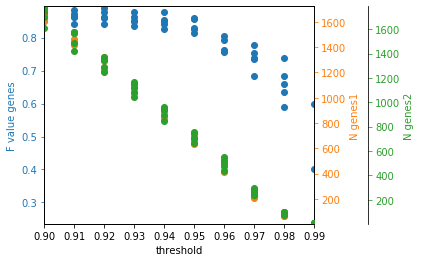

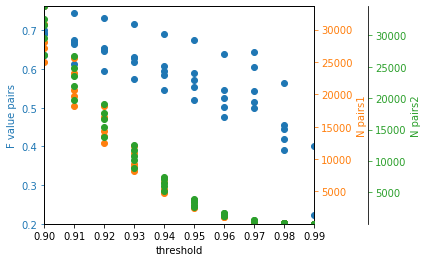

In [12]:
pandas_multi_y_plot(result_all, 'threshold', ['F value genes', 'N genes1','N genes2'],no_line=True)
pandas_multi_y_plot(result_all, 'threshold', ['F value pairs', 'N pairs1','N pairs2'],no_line=True)

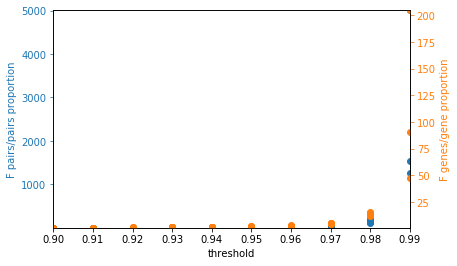

In [13]:
avg_genes=(result_all[['N genes1','N genes2']].sum(axis=1)/2)
gene_proportions=avg_genes/avg_genes.max()
result_all['F genes/gene proportion']=result_all['F value genes']/gene_proportions 

avg_pairs=(result_all[['N pairs1','N pairs2']].sum(axis=1)/2)
pair_proportions=avg_pairs/avg_pairs.max()
result_all['F pairs/pairs proportion']=result_all['F value pairs']/pair_proportions
pandas_multi_y_plot(result_all, 'threshold', ['F pairs/pairs proportion','F genes/gene proportion'],no_line=True)

## Permutation based parameter selection

Average similarity of closes 5 neighbours for all genes on normal data and data permuted by measurements/features

In [184]:
# Take forn NeighbourCalculator to match the data used for non-permuted neighbours -
# e.g. removes some genes that were never expressed
genes_permuted = neighbour_calculator_all._genes.apply(lambda x: x.sample(frac=1).values)
neighbour_calculator_permuted = NeighbourCalculator(genes=genes_permuted)
neigh_permuted, sims_permuted = neighbour_calculator_permuted.neighbours(n_neighbours=6, inverse=False, scale=SCALE, log=LOG,
                                                          return_neigh_dist=True,remove_self=True)

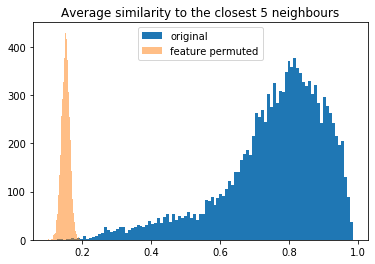

In [185]:
plt.hist(sims_all.mean(axis=1), bins=100,label='original')
plt.hist(sims_permuted.mean(axis=1), bins = 100, alpha=0.5,label='feature permuted')
plt.title('Average similarity to the closest 5 neighbours')
plt.legend()